In [1]:
# Two useful statistical libraries
import scipy.stats as stats
import numpy as np

#Arithmetic Mean



* Synonymous with Average
* Quick window into the average of bunch of data
* It is defined as following:
$$ \mu = \frac{\sum_{i=1}^{N} X_i}{N} $$
where each $X_i$ are the data points.


In [2]:
# We'll use the following two data sets as examples
x1 = [i for i in range(0,10)]
x2 = x1 + [100]


print("A. mean of x1 is: ", sum(x1), '/', len(x1), '=', np.mean(x1))
print("A. mean of x2 is: ", sum(x2), '/', len(x2), '=', np.mean(x2))





A. mean of x1 is:  45 / 10 = 4.5
A. mean of x2 is:  145 / 11 = 13.181818181818182


# Weighted Mean

* Similiar to Arithmetic mean, however the difference now is that each data point $X_i$ has a multiplier assosciated with it, usually denoted as $w_i$, and we dont divide the cumulitave sum by the number of data points anymore
* The formula is: $$ \mu = \sum_{i=1}^{N} w_i \cdot X_i $$

In [3]:
# In the context of financial math, suppose we have some portfolio
# Each X_i represent different asset classes, i.e. equities, bonds, real estate and etc.
# Then we could have for example given the equities in our portfolio %70 weight in measuing the Weighted Mean

#Weighted Arithmetic Mean

* Weighted Artihmetic Mean is just a special case of Weighted mean in which case $\sum_{i=1}^{N} w_i = 1$

# Median



*   The median is simply the exact data point which occurs right in the middle of the list of data points when arranged in decreasing or ascending manner.
*   In the case where $N$ is odd, we simply just choose the $
(n+1)/2$ term

* In the case where $N$ is even, since there is no exact middle term in an even numbered objects, we simply just choose the average of the $n/2$ and $(n+2)/2$ terms.




In [4]:
print('Median of x1:', np.median(x1))
print('Median of x2:', np.median(x2))

Median of x1: 4.5
Median of x2: 5.0


#Mode

We can understand the *Mode* as the value which occurs the most among the data points, thus making it even applicable to non-numeric data as well. The *Mode* of some data set becomes extremely relevant when the underlying assumption about the data is that they are independant from one another. Meaning, suppose we were to examine the *Mode* of the outcome of weighted die over several trials, and we observe that 6 is the mode, then that informs us in which way the die is weighted to favor a certain outcome as opposed to examining the mean, which might be 4.5

In [5]:
# Scipy has a built-in mode function, but it will return exactly one value
# even if two values occur the same number of times, or if no value appears more than once
print('Mode of x1:', stats.mode(x1)[0][0])

Mode of x1: 0


<ipython-input-5-e80e56e938eb>:3: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('Mode of x1:', stats.mode(x1)[0][0])


In [6]:
# One can also define its own, albeit rather naive implementation
def mode(l : list[int]) -> int:

    dic = dict()

    for i in l:
      if i in dic.keys():
        dic[i] += 1
      else:
        dic[i] = 1

    max = 0
    val = 0

    for i,j in enumerate(dic.items()):

      if j[1] > max:

        max = j[1]
        val = j[0]

    return val

x3 = [3, 2, 3, 3, 4, 5, 5]
(mode(x3))

3

#Bins in Financial Data

If we encounter a data set, in which all the data points do occur at most once, then it is rather difficult to find the mode and or even implement a historgram, so rather we instead can split our data set into $n$ many interval where each subinterval is some fixed length, aka bin. And then we proceed to find the *Mode* amongst the bins.

In [7]:
# Get return data for an asset and compute the mode of the data set
start = '2014-01-01'
end = '2015-01-01'

In [8]:
import yfinance as yf

data = yf.download('AAPL', start='2020-01-01', end='2020-12-31')['Close']

[*********************100%***********************]  1 of 1 completed


In [9]:
returns = data.pct_change()[1:]

In [10]:
print('Mode of returns:', mode(returns))

Mode of returns: -0.00972203551987938


In [11]:
# np.histogram returns the frequency distribution over the bins as well as the endpoints of the bins
hist, bins = np.histogram(returns, 20) # Break data up into 20 bins
maxfreq = max(hist)

# Find all of the bins that are hit with frequency maxfreq, then print the intervals corresponding to them
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

Mode of bins: [(-0.0044193447092110705, 0.008003416416441617)]


#Geometric Mean

Unlike the arithmetic mean, the geometric mean is †he multiplication of the data points with the $n$^th root of the total product:
$$
\text{Geometric Mean} = \sqrt[n]{X_1 \cdot X_2 \cdot ... \cdot X_n} =
$$
Where each $X_i \geq 0$ are non-negative data points.

Furthermore, it is always the case that $$ \text{Geom. Mean} \leq \text{Arith. Mean} $$

In [12]:
# Use scipy's gmean function to compute the geometric mean
print('Geometric mean of x1:', stats.gmean(x1))
print('Geometric mean of x2:', stats.gmean(x2))

Geometric mean of x1: 0.0
Geometric mean of x2: 0.0


What if we want to compute the geometric mean when we have negative observations? Suppose once again our data points represent asset returns, and since we are concerned with percent change, the minimum value is at most $-1$, thus it suffices to just add $1$ to each $X_i$, and instead we have:
$$
X' = \sqrt[n]{(1+X_1) \cdot (1+X_2) \cdot ... \cdot (1+X_n)} - 1
$$

In [13]:
# Add 1 to every value in the returns array and then compute R_G
ratios = returns + np.ones(len(returns))
X_new = stats.gmean(ratios) - 1
print('Geometric mean of returns:', X_new)

Geometric mean of returns: 0.002301824223453375


The geometric mean is defined so that if the rate of return over the whole time period were constant and equal to $X_{new}$, then the final price of the security would be the same as in the case of returns $X_1,...,X_n$.

In [14]:
T = len(returns)
init_price = data[0]
final_price = data[T]
print('Initial price:', init_price)
print('Final price:', final_price)
print('Final price as computed with X_new:', init_price*(1 + X_new)**T)

Initial price: 75.0875015258789
Final price: 133.72000122070312
Final price as computed with X_new: 133.72000122070096


#Harmonic Mean

The least refrenced and common form of mean amongs all others. The harmonic mean of a set of numbers is calculated by taking the reciprocal of the arithmetic mean of the reciprocals of the numbers, that is:
$$
H := \frac{N}{\sum_{i=1}^{N} \frac{1}{X_i}}
$$
and vice versa; the reciprocal of the harmonic mean is the arithmetic mean of the reciprocals of the observations:
$$
\frac{1}{H} := \frac{\sum_{i=1}^{N} \frac{1}{X_i}}{N}
$$
The harmonic mean is useful when averaging rates or ratios, i.e. use the harmonic mean when the numbers represent ratios or rates that are being combined or compared. It is especially appropriate when the quantities are not directly additive (e.g. speeds). The harmonic mean better represents the average rate in these cases and it is less subject to outliers compared to the arithmetic mean when used for these types of numbers.

In [15]:
print('Harmonic mean of x1:', stats.hmean(x1))
print('Harmonic mean of x2:', stats.hmean(x2))

Harmonic mean of x1: 0.0
Harmonic mean of x2: 0.0


#Warnings to Heed



*   ### Point Estimates Can Often Be Incorrect
    Since by definition, means collapse entire datasets into one single data point, as such it can *hide* or *destroy* a lot of information. Hence in using point estimates, one should always use information relayed by taking the mean of a distribution within context of other measures such as variance, standard deviation and etc.
*   ### Underlying Distribution Can be Wrong
    Without properly understanding the underlying distribution of the problem at hand, one can incorrectly make use of the information provided by the mean or variance. For example; if one were to use the std. to measure the frequenct of something happenning in which case normality is automatically assumed about the data's distribution, and often this is not the case, hence why one should verify their assumptions about the distribution of the data.



# Skewness

Skewness is a measure of the symmetry of some distribution, along it's mean. A symmetric distribution like a normal distribution has a skewness of 0.

*   **Positive vs negative skewness:** A positively skewed distribution has a long tail to the right. The mean and median are greater than the mode. Examples are wealth distributions and income distributions, which have many low values but also some very high values. A negatively skewed distribution has a long tail to the left. The mean and median are less than the mode. Examples are IQ scores, which have an upper limit but no lower limit.
*   **Measuring skewness:** The most common measure of skewness uses the third standardized moment around the mean. Positive values indicate positive skewness, negative values indicate negative skewness. The larger the absolute value, the greater the skewness.

*  **Interpretation:** Skewness indicates the degree and direction of asymmetry. Positively skewed data typically has extreme high values that can influence statistics like the mean. Negatively skewed data has extreme low values that can influence the mean. Skewness helps identify outliers and non-normal distributions.

* **Uses**: Examining skewness can help in selecting appropriate statistical tests, transforming data, detecting anomalies, adjusting for biases, and choosing summary statistics. Highly skewed data may require special treatment in analysis.



Skewness is an important concept in asset pricing because investment returns often exhibit skewness. Here are some key ways skewness is useful in asset pricing:

- Evaluating risk: Positive skewness indicates there is potential for extreme positive returns, while negative skewness indicates potential for large losses. Understanding the skewness helps assess the riskiness of an investment.

- Modeling asset prices: Many asset pricing models such as the CAPM assume normal distribution of returns. However, returns often have positive skewness. Adjusting for skewness can improve asset pricing models.

- Explaining anomalies: Skewness preferences can explain anomalies like the equity premium puzzle - stocks have higher average returns partly due to investors liking the positive skewness of stock returns.

- Portfolio optimization: Investors may optimize portfolios to prefer positive skewness in order to increase chances of very high returns. This may lead to underweighting assets with negative skewness.

- Understanding crashes: Crashes and severe market declines exhibit high negative skewness. Analyzing skewness can provide information about likelihood of crashes.

- Risk management: Positions with negative skewness may require managing 'tail risk' to limit maximum potential losses. Skewness helps inform approaches to risk management.

In summary, skewness is a key characteristic of asset returns that provides information about risk, affects investor behavior, and has significant implications for asset pricing models, portfolio choice, and risk management. Incorporating skewness is important for better financial decision making.


We use the following formula to compute skewness:
$$
\text{{Skewness}} = \frac{{E[(X - \mu)^3]}}{{\sigma^3}}
$$

Please note that in the skewness formula, $X$ is the random variable, $\mu$ is the mean of $X$, $\sigma$ is the standard deviation of $X$, and $E$ denotes the expected value.

In [35]:
# Recall a data set is positivly skewed if the mode is smaller than the median, which is smaller than the mean.
# A data set is negativly skewed in the event that the mean is greater than the median, which is greater than the mode.
# So let us analyze the skewness of SPY over a certain period
import matplotlib.pyplot as plt

# Collect Data.
price = yf.download('NVDA', start = '2022-01-01', end='2023-07-01')['Close']
returns = price.pct_change()[1:]

def skewness(X):
    n = len(X)
    mean_X = np.mean(X)
    std_X = np.std(X)
    skewness = (1/n) * np.sum((X - mean_X)**3) / std_X**3
    return skewness

def describe_skewness(skewness):
    if skewness < -1:
        return "The distribution is highly skewed to the left."
    elif -1 <= skewness <= -0.5:
        return "The distribution is moderately skewed to the left."
    elif 0.5 <= skewness <= 1:
        return "The distribution is moderately skewed to the right."
    elif skewness > 1:
        return "The distribution is highly skewed to the right."
    elif -0.5 < skewness < 0.5:
        return "The distribution is approximately symmetric."
    else:
        return "Invalid skewness value."

# Example usage:
skewness_value = skewness(returns)  # Assuming X is your data
print(describe_skewness(skewness_value))


[*********************100%***********************]  1 of 1 completed
The distribution is moderately skewed to the right.


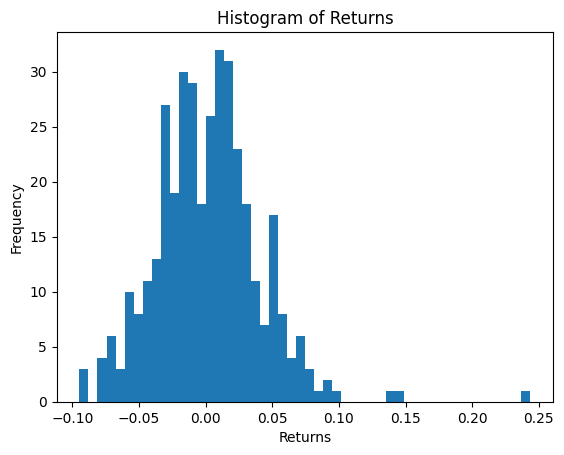

In [36]:
# By plotting the returns we can it is just barely positively skewed, that is; fewer higher values and a longer right tail
plt.hist(returns, bins = 50);
plt.xlabel('Returns');
plt.ylabel('Frequency');
plt.title('Histogram of Returns');